In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
# def fetch(url):
#     import requests, os, haslib, gzip
#     fp=os.path.join('/tmp',haslib.md5(url.encode('utf-8')).hexdigest())
#     if not os.path.isfile(fp):
#         with open(fp,'rb') as f:
#             data=f.read()
#     else :
#         with open(fp,'wb') as f:
#             data = requests.get(url).content
#             f.write(data)
#     return numpy.frombuffer(gzip.decompress(data),dtype=np.uint8)

In [5]:
import os
import hashlib
import gzip
import requests
import numpy as np

def fetch(url, cache_dir='/tmp'):
    """
    Fetch and cache URL content as a numpy array.
    
    Args:
        url (str): URL to fetch data from
        cache_dir (str, optional): Directory to store cached files. Defaults to '/tmp'.
    
    Returns:
        numpy.ndarray: Decompressed data as a uint8 numpy array
    """
    # Create cache directory if it doesn't exist
    os.makedirs(cache_dir, exist_ok=True)
    
    # Generate unique filename based on URL hash
    filename = hashlib.md5(url.encode('utf-8')).hexdigest()
    filepath = os.path.join(cache_dir, filename)
    
    # Check if file exists in cache
    if os.path.isfile(filepath):
        # Read from cache
        with open(filepath, 'rb') as f:
            data = f.read()
    else:
        # Fetch from URL and cache
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad responses
        data = response.content
        
        # Save to cache
        with open(filepath, 'wb') as f:
            f.write(data)
    
    # Decompress and convert to numpy array
    try:
        decompressed_data = gzip.decompress(data)
        return np.frombuffer(decompressed_data, dtype=np.uint8)
    except gzip.BadGzipFile:
        # Handle non-gzipped data
        return np.frombuffer(data, dtype=np.uint8)

# Example usage
# data = fetch('https://example.com/compressed_data.gz')

In [6]:
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

HTTPError: 404 Client Error: Not Found for url: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

In [11]:
import pandas as pd

In [12]:
df1=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [13]:
df1.shape

(42000, 785)

In [14]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x=df1.iloc[:,1:]

In [16]:
x.shape

(42000, 784)

In [17]:
y=df1.iloc[:,0]

In [18]:
y.shape

(42000,)

In [19]:
from sklearn.model_selection import train_test_split as tts

In [20]:
X_train, X_test, y_train, y_test = tuple(np.array(x,dtype=np.uint8) for x in tts(
        x, y,test_size=0.2,shuffle=True))

In [21]:
X_train.dtype

dtype('uint8')

In [22]:
type(X_train)

numpy.ndarray

In [23]:
X_train.shape

(33600, 784)

(<matplotlib.image.AxesImage at 0x7e5f010f7010>, 1)

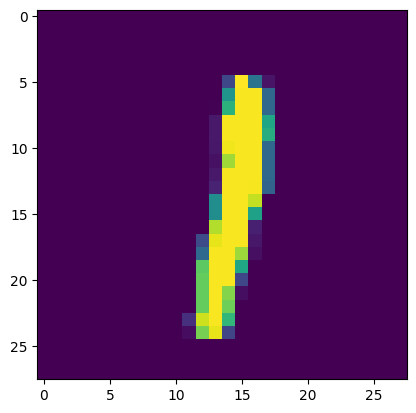

In [27]:
imshow(X_train[0].reshape(28,28)),y_train[0]

In [71]:
import torch
import torch.nn as nn

In [72]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(784,128)
        self.act=nn.ReLU()
        self.l2=nn.Linear(128,10)
    def forward(self,x):
        x=self.l1(x)
        x=self.act(x)
        x=self.l2(x)
        return x

In [73]:
model=net()

In [74]:
model(torch.tensor(X_train[0:10],dtype=torch.float32))

tensor([[-3.9543e+00,  2.2092e+00, -1.6248e+01, -1.7223e+01, -1.7702e+00,
          2.3542e+01,  1.3320e+01,  2.9660e+00, -5.3207e+00,  7.2305e+00],
        [-1.0258e+01, -8.5821e-01, -4.7708e+00, -1.4867e+01,  7.8297e+00,
          2.8882e+01,  8.6966e+00, -2.4806e+00, -3.9731e+00,  1.3398e+01],
        [-5.1635e+01,  6.2676e+00,  6.9472e+00,  8.3005e+00, -1.0637e+01,
         -1.4508e+01, -8.2609e+00,  2.5256e+01, -3.2137e+01,  3.0959e+00],
        [-2.5226e+01, -4.0300e-01,  1.1764e+01, -2.1504e+01,  5.3697e+00,
          8.5679e+00, -2.3466e+01,  2.5263e+01,  9.4203e-01,  2.2226e+00],
        [-3.0547e+01,  8.5711e+00,  3.0327e+00, -1.8412e+00,  3.9083e+00,
          1.6446e+01, -1.2225e+01,  2.8798e+01, -1.2519e+01,  2.3523e+00],
        [-3.9648e+01,  6.7932e+00, -3.9902e-01,  9.6857e-01,  5.4151e+00,
         -1.8309e+01, -1.4296e+01,  1.4622e+01, -1.8100e+01,  1.4348e+01],
        [-4.2338e+01, -2.0517e+00, -7.0712e+00, -1.2258e+01, -8.6556e+00,
         -4.0707e+00, -1.9542e+0

In [75]:
model(torch.tensor(X_train[0:10]).float())

tensor([[-3.9543e+00,  2.2092e+00, -1.6248e+01, -1.7223e+01, -1.7702e+00,
          2.3542e+01,  1.3320e+01,  2.9660e+00, -5.3207e+00,  7.2305e+00],
        [-1.0258e+01, -8.5821e-01, -4.7708e+00, -1.4867e+01,  7.8297e+00,
          2.8882e+01,  8.6966e+00, -2.4806e+00, -3.9731e+00,  1.3398e+01],
        [-5.1635e+01,  6.2676e+00,  6.9472e+00,  8.3005e+00, -1.0637e+01,
         -1.4508e+01, -8.2609e+00,  2.5256e+01, -3.2137e+01,  3.0959e+00],
        [-2.5226e+01, -4.0300e-01,  1.1764e+01, -2.1504e+01,  5.3697e+00,
          8.5679e+00, -2.3466e+01,  2.5263e+01,  9.4203e-01,  2.2226e+00],
        [-3.0547e+01,  8.5711e+00,  3.0327e+00, -1.8412e+00,  3.9083e+00,
          1.6446e+01, -1.2225e+01,  2.8798e+01, -1.2519e+01,  2.3523e+00],
        [-3.9648e+01,  6.7932e+00, -3.9902e-01,  9.6857e-01,  5.4151e+00,
         -1.8309e+01, -1.4296e+01,  1.4622e+01, -1.8100e+01,  1.4348e+01],
        [-4.2338e+01, -2.0517e+00, -7.0712e+00, -1.2258e+01, -8.6556e+00,
         -4.0707e+00, -1.9542e+0

In [77]:
from tqdm import trange

In [76]:
bs=32
loss_func=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
for i in range(100):
    samp=np.random.randint(0,X_train.shape[0],size=(bs))
    out=model(torch.tensor(X_train[samp]).float())
    y=torch.tensor(y_train[samp]).long()
    loss=loss_func(out,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    print(loss)

tensor(26.0882, grad_fn=<NllLossBackward0>)
tensor(20.4044, grad_fn=<NllLossBackward0>)
tensor(13.5339, grad_fn=<NllLossBackward0>)
tensor(17.8317, grad_fn=<NllLossBackward0>)
tensor(16.2716, grad_fn=<NllLossBackward0>)
tensor(8.7250, grad_fn=<NllLossBackward0>)
tensor(13.1861, grad_fn=<NllLossBackward0>)
tensor(5.3720, grad_fn=<NllLossBackward0>)
tensor(8.2456, grad_fn=<NllLossBackward0>)
tensor(6.4141, grad_fn=<NllLossBackward0>)
tensor(4.4817, grad_fn=<NllLossBackward0>)
tensor(5.2358, grad_fn=<NllLossBackward0>)
tensor(3.7693, grad_fn=<NllLossBackward0>)
tensor(4.1496, grad_fn=<NllLossBackward0>)
tensor(6.9836, grad_fn=<NllLossBackward0>)
tensor(4.4569, grad_fn=<NllLossBackward0>)
tensor(5.4743, grad_fn=<NllLossBackward0>)
tensor(3.0762, grad_fn=<NllLossBackward0>)
tensor(2.8703, grad_fn=<NllLossBackward0>)
tensor(1.7426, grad_fn=<NllLossBackward0>)
tensor(1.9492, grad_fn=<NllLossBackward0>)
tensor(3.3055, grad_fn=<NllLossBackward0>)
tensor(0.6335, grad_fn=<NllLossBackward0>)
tenso

In [81]:
bs=32
loss_func=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters())
for i in (t:= trange(100)):
    samp=np.random.randint(0,X_train.shape[0],size=(bs))
    out=model(torch.tensor(X_train[samp]).float())
    y=torch.tensor(y_train[samp]).long()
    loss=loss_func(out,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    t.set_description('loss %.2f' % loss.item())

loss 0.71: 100%|██████████| 100/100 [00:00<00:00, 239.56it/s]


In [49]:
np.random.randint(0,100,size=(2))

array([33, 93])

In [66]:
model.parameters()

<generator object Module.parameters at 0x7e5e68d307b0>

In [24]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'San Francisco', 'Chicago', 'Boston'],
    'Salary': [50000, 60000, 75000, 90000]
}
df = pd.DataFrame(data)

# 1. Select a single column (returns a Series)
single_column = df['Name']
print("1. Single Column Selection:")
print(single_column)
print("\n")

# 2. Select multiple columns (returns a DataFrame)
multiple_columns = df[['Name', 'City']]
print("2. Multiple Column Selection:")
print(multiple_columns)
print("\n")

# 3. Using .loc[] to select columns by label
loc_columns = df.loc[:, ['Name', 'Salary']]
print("3. Using .loc[] to select columns:")
print(loc_columns)
print("\n")

# 4. Using .iloc[] to select columns by integer index
iloc_columns = df.iloc[:, [0, 2]]  # First and third columns
print("4. Using .iloc[] to select columns:")
print(iloc_columns)
print("\n")

# 5. Select columns by data type
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
print("5. Columns by Data Type (Numeric):")
print(numeric_columns)
print("\n")

# 6. Select columns that contain specific strings
columns_with_a = df.filter(regex='A')
print("6. Columns Containing 'A':")
print(columns_with_a)

1. Single Column Selection:
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object


2. Multiple Column Selection:
      Name           City
0    Alice       New York
1      Bob  San Francisco
2  Charlie        Chicago
3    David         Boston


3. Using .loc[] to select columns:
      Name  Salary
0    Alice   50000
1      Bob   60000
2  Charlie   75000
3    David   90000


4. Using .iloc[] to select columns:
      Name           City
0    Alice       New York
1      Bob  San Francisco
2  Charlie        Chicago
3    David         Boston


5. Columns by Data Type (Numeric):
   Age  Salary
0   25   50000
1   30   60000
2   35   75000
3   40   90000


6. Columns Containing 'A':
   Age
0   25
1   30
2   35
3   40
